In [1]:
import h5py
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt

folder = 'out_veremi'

def normalize3(a, min_a, max_a):
	return (a - min_a) / (max_a - min_a + 0.0001)

In [2]:
V = pd.read_feather('out_veremi/veremi-atk.feather')

In [19]:
V[V.attack_type == 9]

,dataset_id,message_id,bsm_rcv_time,receiver,sender,attack_type,snd_pos_x,snd_pos_y,snd_spd_x,snd_spd_y,...,snd_hed_y,rcv_pos_x,rcv_pos_y,rcv_spd_x,rcv_spd_y,rcv_acl_x,rcv_acl_y,rcv_hed_x,rcv_hed_y,time_id
85,0.0,44259.0,50414.625000,45.0,15.0,9.0,1394.055176,1179.457397,0.0,0.0,...,-0.997676,1392.168945,1219.160889,0.535781,-3.087262,0.339529,-1.956544,0.141768,-0.989900,0.0
86,0.0,44572.0,50415.625000,45.0,15.0,9.0,1394.055176,1179.457397,0.0,0.0,...,-0.997676,1393.080688,1215.047852,0.859172,-4.950407,0.274399,-1.581043,0.141768,-0.989900,0.0
87,0.0,44885.0,50416.625000,45.0,15.0,9.0,1394.055176,1179.457397,0.0,0.0,...,-0.997676,1394.086060,1209.144531,0.823467,-6.697021,0.161011,-1.309574,0.092601,-0.995703,0.0
88,0.0,45198.0,50417.625000,45.0,15.0,9.0,1394.055176,1179.457397,0.0,0.0,...,-0.997676,1394.733887,1201.356079,0.627527,-8.710967,0.166863,-2.317261,0.035649,-0.999364,0.0
89,0.0,45501.0,50418.625000,45.0,15.0,9.0,1394.055176,1179.457397,0.0,0.0,...,-0.997676,1395.299316,1191.446899,0.360362,-10.876843,0.083713,-2.528644,-0.003134,-0.999995,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5385575,13.0,65526888.0,32395.931641,24315.0,24393.0,9.0,1340.228271,1049.758057,0.0,0.0,...,-0.860050,1165.630371,963.821289,-15.476468,-3.983952,0.238629,0.061429,-0.990120,0.140221,0.0
5385576,13.0,65538264.0,32396.931641,24381.0,24393.0,9.0,1340.228271,1049.758057,0.0,0.0,...,-0.860050,1393.618286,1168.097168,-0.974768,-12.489721,0.033037,0.421183,-0.096199,-0.995362,0.0
5385577,13.0,65544548.0,32397.931641,24381.0,24393.0,9.0,1340.228271,1049.758057,0.0,0.0,...,-0.860050,1390.921265,1155.766724,-2.641611,-12.257500,-0.047542,-0.220711,-0.234214,-0.972185,0.0
5385578,13.0,65550724.0,32398.931641,24381.0,24393.0,9.0,1340.228271,1049.758057,0.0,0.0,...,-0.860050,1387.910645,1143.537231,-3.604973,-12.099956,-0.174004,-0.584140,-0.308581,-0.951198,0.0


In [16]:
V[(V.dataset_id == 0) & (V.sender == 10071) & (V.receiver == 9999)].head(50)

,dataset_id,message_id,bsm_rcv_time,receiver,sender,attack_type,snd_pos_x,snd_pos_y,snd_spd_x,snd_spd_y,...,snd_hed_y,rcv_pos_x,rcv_pos_y,rcv_spd_x,rcv_spd_y,rcv_acl_x,rcv_acl_y,rcv_hed_x,rcv_hed_y,time_id
161011,0.0,18795524.0,57530.972656,9999.0,10071.0,0.0,1079.510010,941.821045,-1.735661,-0.446795,...,-0.249293,1010.350281,927.427307,-15.488740,-3.873554,0.645211,0.161391,-0.990817,-0.135213,0.0
161012,0.0,18797082.0,57531.972656,9999.0,10071.0,0.0,1076.661499,941.073486,-3.808725,-0.980075,...,-0.214532,994.915222,922.145386,-14.793708,-6.110409,-0.106108,-0.043805,-0.965221,-0.261435,0.0
161013,0.0,18798568.0,57532.972656,9999.0,10071.0,0.0,1071.683594,939.792358,-5.977549,-1.538375,...,-0.198324,981.387634,913.659912,-13.000948,-9.286374,-0.435746,-0.311231,-0.885892,-0.463891,0.0
161017,0.0,18804928.0,57536.972656,9999.0,10071.0,0.0,1029.877563,932.367798,-14.113419,-3.617267,...,-0.192414,931.988525,872.966248,-11.493793,-11.073228,-0.251929,-0.242710,-0.821698,-0.569924,0.0
161018,0.0,18806476.0,57537.972656,9999.0,10071.0,0.0,1014.697388,928.573914,-15.347199,-3.838014,...,-0.186673,920.491943,861.872986,-11.487712,-11.067369,0.447642,0.431263,-0.821698,-0.569924,0.0
161019,0.0,18807956.0,57538.972656,9999.0,10071.0,0.0,999.396667,923.997314,-14.606408,-6.032698,...,-0.266943,909.058411,850.819336,-11.591546,-11.001423,0.072365,0.068683,-0.825937,-0.563762,0.0
161020,0.0,18809444.0,57539.972656,9999.0,10071.0,0.0,985.611450,916.494629,-12.930728,-9.236116,...,-0.444953,898.188049,839.340576,-10.975528,-11.581915,0.135066,0.142527,-0.794919,-0.606715,0.0
161021,0.0,18810914.0,57540.972656,9999.0,10071.0,0.0,972.863525,907.199951,-12.611274,-9.542295,...,-0.469407,887.374878,827.705872,-11.031625,-11.641117,-0.124927,-0.131831,-0.794919,-0.606715,0.0
161022,0.0,18816792.0,57541.972656,9999.0,10071.0,0.0,960.156799,897.404541,-12.506599,-9.753688,...,-0.482265,877.129761,815.456482,-10.242888,-12.212987,0.635062,0.757201,-0.756695,-0.653768,0.0
161023,0.0,18818254.0,57542.972656,9999.0,10071.0,0.0,947.702698,887.525696,-12.394263,-9.742924,...,-0.470666,867.114075,802.975647,-9.960514,-12.516932,-0.389711,-0.489734,-0.737872,-0.674940,0.0


In [2]:
f = h5py.File('out_veremi/veremi-atk-10.h5')

In [3]:
train_fg = f['train_full_genuine']

test = f['test']
test_labels = f['test_labels']

In [8]:
test[-1]

array([[0.4603072 , 0.43959966, 0.3157628 , 0.3241907 ],
       [0.46085134, 0.44143775, 0.31580675, 0.32420996],
       [0.46025202, 0.42605928, 0.30649063, 0.40780658],
       ...,
       [0.5440887 , 0.51549965, 0.42091185, 0.5499303 ],
       [0.4825043 , 0.50633323, 0.13609555, 0.16347288],
       [0.5010955 , 0.5655196 , 0.20279324, 0.14904197]], dtype=float32)

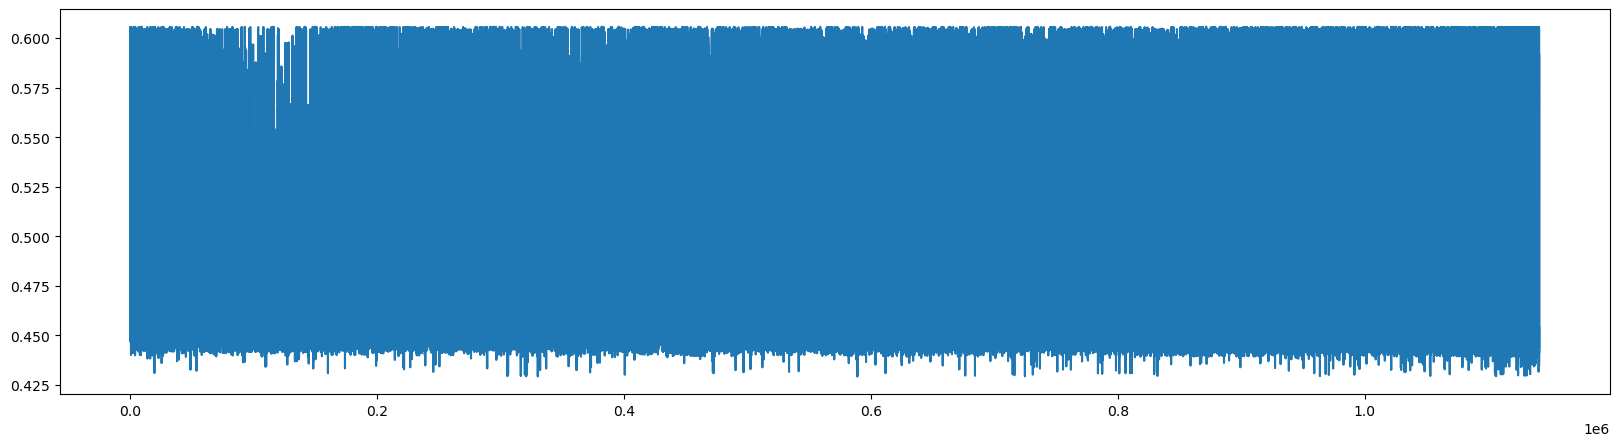

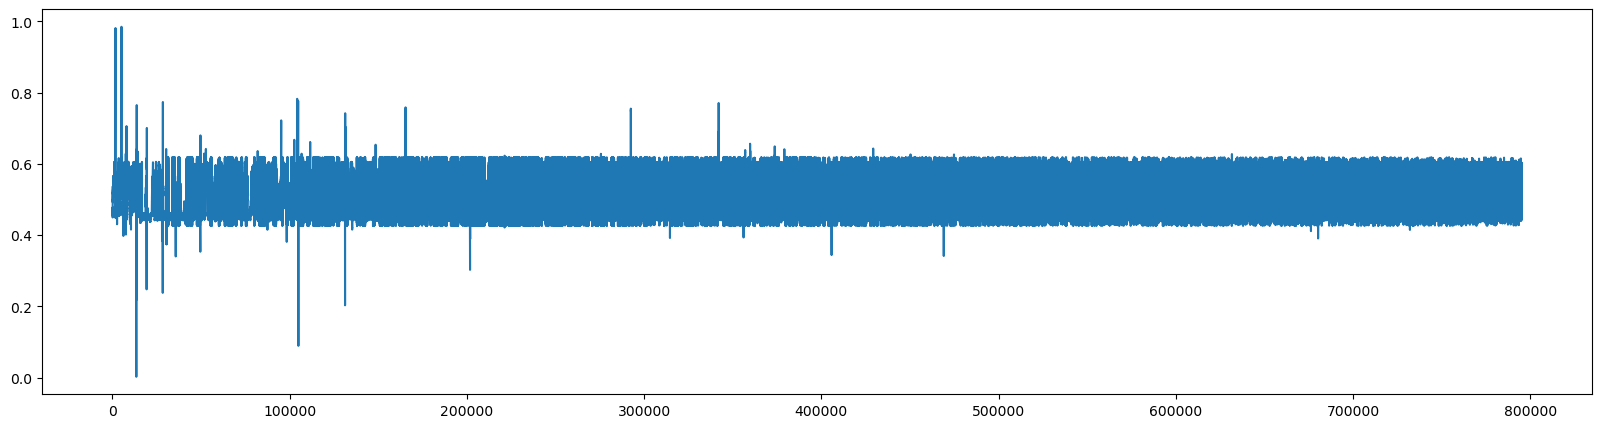

In [4]:
plt.figure(figsize=(20, 5))
plt.plot(train_fg[-1, :, 0])
plt.show()
plt.figure(figsize=(20, 5))
plt.plot(test[-1, :, 0])

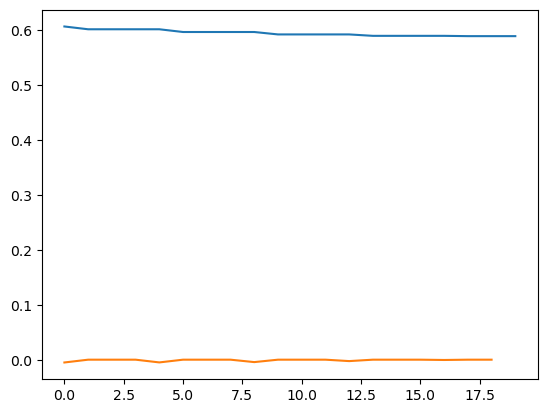

In [5]:
plt.plot(test[:, 100, 0])
plt.plot(test[1:, 100, 0] - test[:-1, 100, 0])

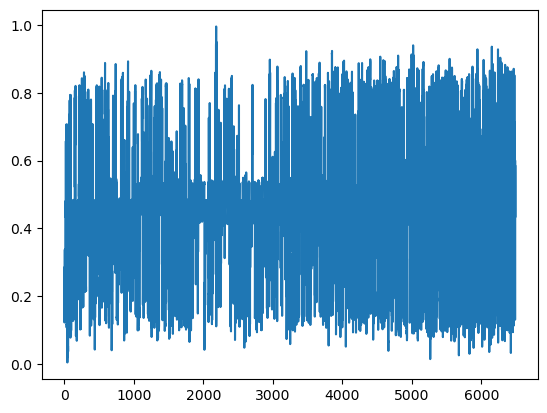

In [7]:
t_fg = train_fg[1:, :, 0] - train_fg[:-1, :, 0]
t_fg = normalize3(t_fg, t_fg.min(), t_fg.max())
plt.plot(t_fg[-1])

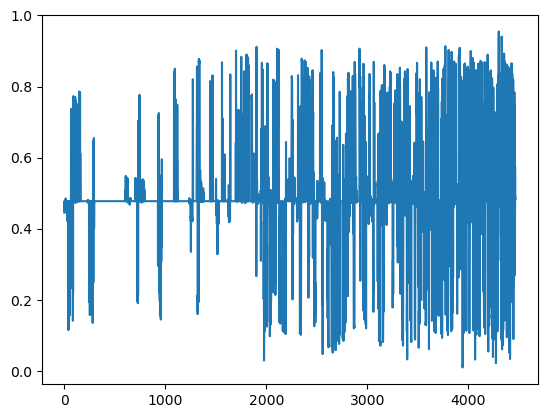

In [12]:
t = (test[1:, :, 0] - test[:-1, :, 0])
t = normalize3(t, t.min(), t.max())
plt.plot(t[-1])

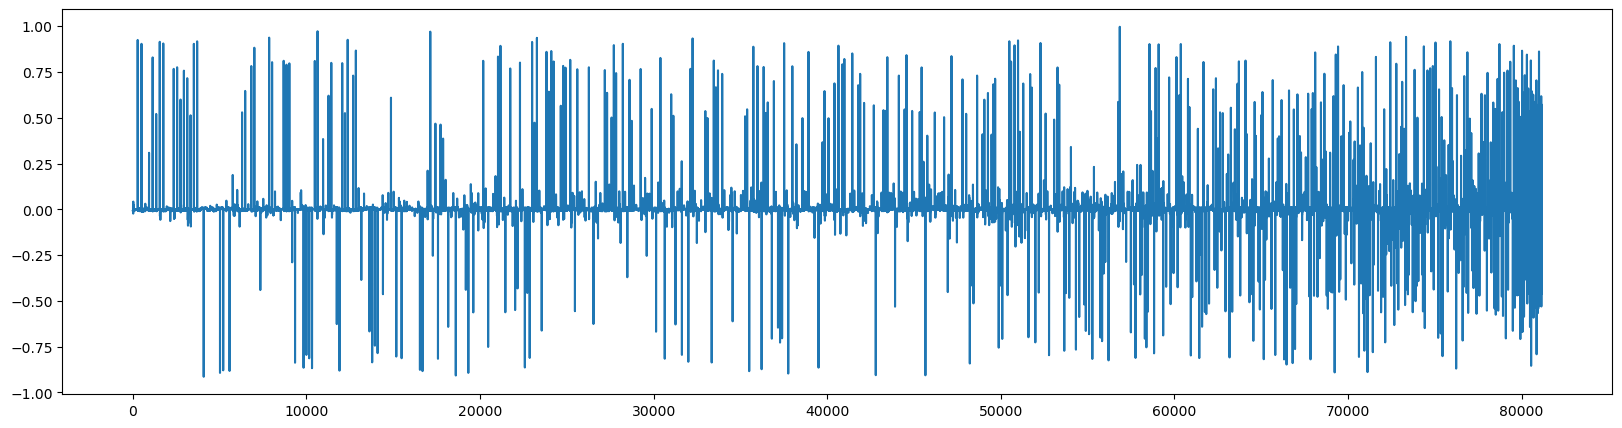

In [50]:
plt.figure(figsize=(20, 5))
plt.plot(train_fg[-1, 1:, 0] - train_fg[-1, :-1, 0])

In [21]:
labels[:, 0]

array([13, 13, 13, ...,  0,  0,  0], dtype=uint32)

In [7]:
V = pd.read_feather('out_veremi/test-dos.feather')

In [9]:
V.groupby(['receiver', 'attack_type']).attack_type.mean()

receiver  attack_type
9.0       0.0             0.0
          13.0           13.0
15.0      0.0             0.0
          13.0           13.0
21.0      0.0             0.0
                         ... 
10101.0   0.0             0.0
10107.0   0.0             0.0
10113.0   0.0             0.0
10119.0   0.0             0.0
10131.0   0.0             0.0
Name: attack_type, Length: 2462, dtype: float32

In [4]:
np.unique(labels[:, 1])

array([13], dtype=uint32)

[   3    0 4863]


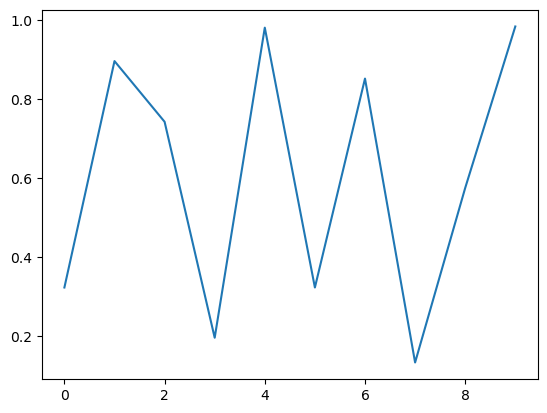

In [9]:
seq = 0
print(labels[-610])
plt.plot(test[:, -610, 0])

In [ ]:
np.random.seed(seed=42)
print(f['train_full_genuine'].shape[1])
seqs = np.random.randint(f['train_full_genuine'].shape[1], size=(10,))
seqs.sort()

print(seqs)
f['train_full_genuine'][:, seqs, 16]

In [ ]:
all_seqs = np.concatenate((f['train_full_genuine'], f['test']), axis=1)
min_a = np.min(all_seqs, axis=(0, 1))
max_a = np.max(all_seqs, axis=(0, 1))
del all_seqs
min_a, max_a

In [ ]:
train = f['train_full_genuine'][:]
test = f['test'][:]

train = normalize3(train, min_a, max_a)
test = normalize3(test, min_a, max_a)

labels = f['test_labels'][:]

np.save(os.path.join(folder, 'train.npy'), train)
np.save(os.path.join(folder, 'test.npy'), test)
np.save(os.path.join(folder, 'labels.npy'), labels)

In [ ]:
labels = f['test_labels'][:]

In [ ]:
labels[356]